In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Graph(): 
    
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)] 

    def minDistance(self, dist, sptSet): 
        min = sys.maxsize 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 
        return min_index 

    def dijkstra(self, src): 
        dist = [sys.maxsize] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 
        for cout in range(self.V): 
            u = self.minDistance(dist, sptSet) 
            sptSet[u] = True
            for v in range(self.V): 
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]: 
                    dist[v] = dist[u] + self.graph[u][v] 
        return dist

Matriz de rutas: 
[[0 0 1 1 1]
 [0 0 1 0 1]
 [1 1 0 1 1]
 [1 0 1 0 0]
 [1 1 1 0 0]]
Matriz de movimientos: 
[[3. 0.]
 [3. 2.]]
Se puede llegar desde 3.0 hasta 2.0
Camino: [3, 2]


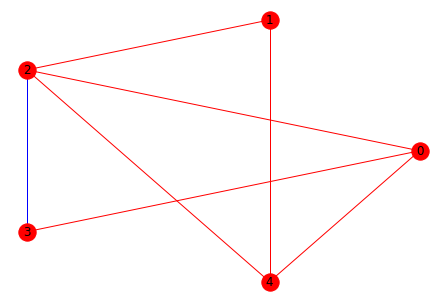

In [92]:
n1 = 5
n2 = 2
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(2, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

g = Graph(n1) 
g.graph = a
"""
for i in range(n1):
    distance[:, i] = g.dijkstra(i)
print("Matriz de distancias: \n{}".format(distance))
"""

for i in range(n2):
    moves[i,:] = np.random.choice(n1, 2)
print("Matriz de movimientos: \n{}".format(moves))

net = nx.from_numpy_matrix(a)
for e in net.edges():
    net[e[0]][e[1]]['color'] = 'red'

i = 1
flag1 = 0
x = int(moves[i,0])
y = int(moves[i,1])
camino = []
camino.append(x)

while not flag1:
    flag2 = 0
    for j in range(n1):
        if (a[x,y] != 0) or (x==y):
            camino.append(y)
            net[camino[-2]][camino[-1]]['color'] = 'blue'
            flag1 = 1
            break

    if not flag1:
        while not flag2:
            x1 = np.random.choice(n1)
            if (a[x1,y] != 0):
                x = np.copy(x1)
                camino.append(x1)
                net[camino[-2]][camino[-1]]['color'] = 'blue'
                flag2 = 1
        
print("Se puede llegar desde {} hasta {}".format(moves[i,0],moves[i,1]))
print("Camino: {}".format(camino))
edge_color_list = [net[e[0]][e[1]]['color'] for e in net.edges()]
nx.draw_circular(net, with_labels=True,node_color='red',edge_color = edge_color_list)
plt.show()

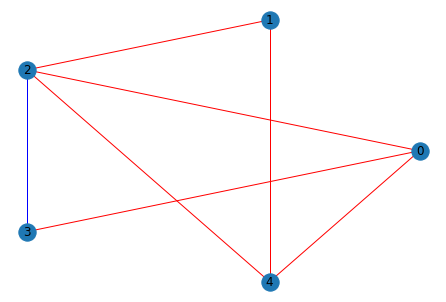

In [93]:
p = nx.shortest_path(net,int(moves[i,0]),int(moves[i,1]))
for e in net.edges():
    net[e[0]][e[1]]['color'] = 'red'
    
for i in range(len(p)-1):
    net[p[i]][p[i+1]]['color'] = 'blue'

edge_color_list = [ net[e[0]][e[1]]['color'] for e in net.edges() ]
nx.draw_circular(net,edge_color = edge_color_list, with_labels = True)
plt.show()